# 2021/12/28
# 本代码绘制论文version1.1中的图5
# 700hpa环流及Q1

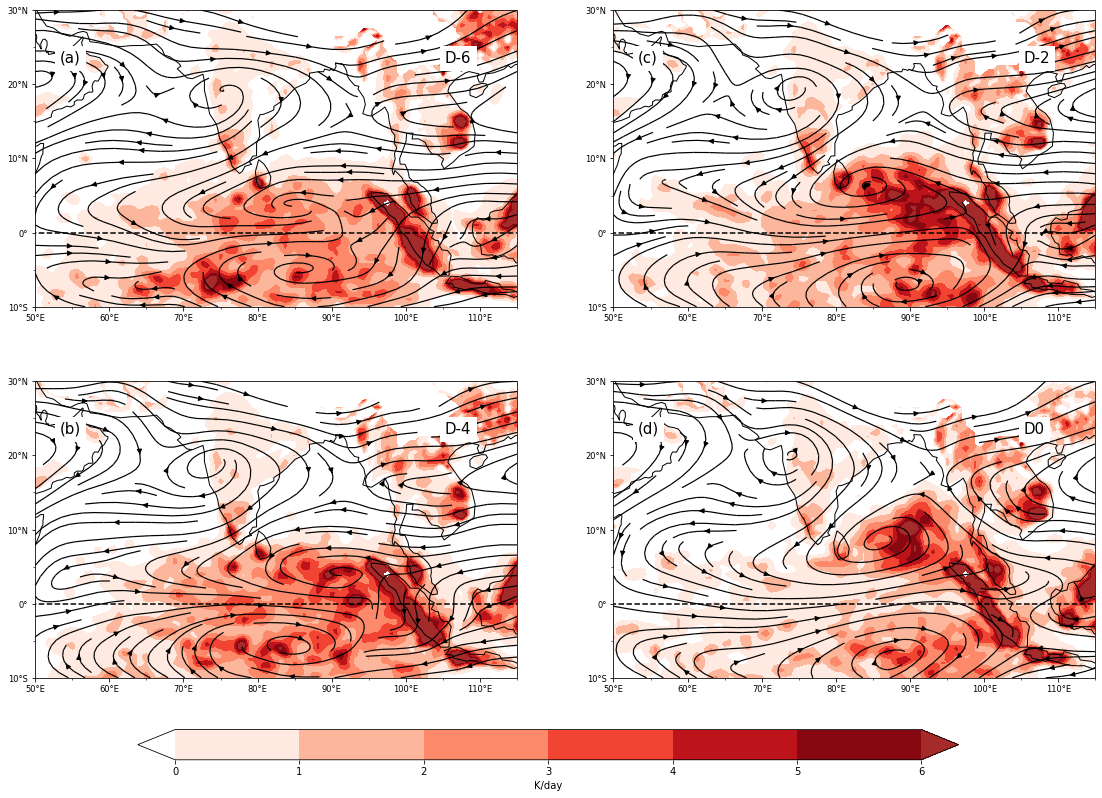

In [10]:
import os
import sys
import xarray as xr
import numpy as np
module_path = ["/home/sun/mycode/module/","/data5/2019swh/mycode/module/"]
sys.path.append(module_path[0])
from module_sun import *
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from metpy.units import units
from matplotlib.path import Path
import matplotlib.patches as patches
import matplotlib as mpl

path  =  "/home/sun/qomo-data/"
level =  700
lon_slice  =  slice(40,120)
lat_slice  =  slice(-15,40)

lonmin,lonmax,latmin,latmax  =  50,115,-10,30
extent     =  [lonmin,lonmax,latmin,latmax]

f1  =  xr.open_dataset(path+"composite3.nc").sel(level=level,lon=lon_slice,lat=lat_slice)   
f2  =  xr.open_dataset(path+"composite-Q1-merra2.nc").sel(level=slice(850,500),lon=lon_slice,lat=lat_slice)  

q1_average  =  np.average(f2.Q1,axis=1)

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

viridis = cm.get_cmap('Reds', 16)
newcolors = viridis(np.linspace(0, 1, 16))
#pink = np.array([1, 1, 1, 1])
#newcolors[0, :] =  pink
newcmp = ListedColormap(newcolors)
newcmp.set_under('white')
newcmp.set_over('brown')

dates  =  [-6,-4,-2,0] #总共8张图
date   =  [24,26,28,30]
number =  ["a","b","c","d","e","f","g","h","i"]
props = dict(boxstyle='square', edgecolor='white', facecolor='white', alpha=1)

proj    =  ccrs.PlateCarree()
fig1    =  plt.figure(figsize=(19,14))
spec1   =  fig1.add_gridspec(nrows=2,ncols=2)

j = 0
    
for col in range(2):
    for row in range(2):
            ax = fig1.add_subplot(spec1[row,col],projection=proj)
            ax.coastlines(resolution='110m',lw=1,zorder=3)
            # 设置经纬度刻度.
            set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='small')
            ax.set_extent(extent, crs=proj)
            
            ax.plot([40,120],[0,0],'k--')
            im  =  ax.contourf(f2.lon,f2.lat,q1_average[date[j]],np.linspace(0,6,7),cmap=newcmp,alpha=1,extend='both')
            ax.streamplot(f1.lon.data, f1.lat.data, f1.uwind.data[date[j],:], f1.vwind.data[date[j],:], color='k',linewidth=1.2,density=1)
            ax.text(0.85,0.825,"D"+str(dates[j]),transform=ax.transAxes,bbox=props,fontsize=15)
            ax.text(0.05,0.825,"("+number[j]+")",transform=ax.transAxes,bbox=props,fontsize=15)
        
            j += 1

    
fig1.subplots_adjust(top=0.8) 
cbar_ax = fig1.add_axes([0.2, 0.05, 0.6, 0.03]) 
fig1.colorbar(im, cax=cbar_ax, shrink=0.1, pad=0.01, orientation='horizontal',label='K/day')

plt.savefig("/home/sun/paint/lunwen/version2.0/fig4_version2.0_700_stream_q1_1.pdf",dpi=300)

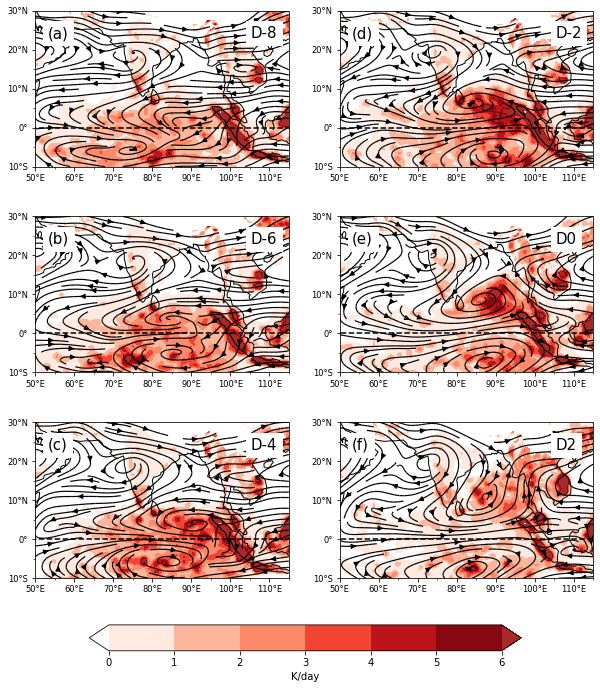

In [9]:
import os
import sys
import xarray as xr
import numpy as np
module_path = ["/home/sun/mycode/module/","/data5/2019swh/mycode/module/"]
sys.path.append(module_path[0])
from module_sun import *
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from metpy.units import units
from matplotlib.path import Path
import matplotlib.patches as patches
import matplotlib as mpl

path  =  "/home/sun/qomo-data/"
level =  700
lon_slice  =  slice(40,120)
lat_slice  =  slice(-15,40)

lonmin,lonmax,latmin,latmax  =  50,115,-10,30
extent     =  [lonmin,lonmax,latmin,latmax]

f1  =  xr.open_dataset(path+"composite3.nc").sel(level=level,lon=lon_slice,lat=lat_slice)   
f2  =  xr.open_dataset(path+"composite-Q1-merra2.nc").sel(level=slice(850,500),lon=lon_slice,lat=lat_slice)  

q1_average  =  np.average(f2.Q1,axis=1)

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

viridis = cm.get_cmap('Reds', 16)
newcolors = viridis(np.linspace(0, 1, 16))
#pink = np.array([1, 1, 1, 1])
#newcolors[0, :] =  pink
newcmp = ListedColormap(newcolors)
newcmp.set_under('white')
newcmp.set_over('brown')

dates  =  [-8,-6,-4,-2,0,2] #总共8张图
date   =  [22,24,26,28,30,32]
number =  ["a","b","c","d","e","f","g","h","i"]
props = dict(boxstyle='square', edgecolor='white', facecolor='white', alpha=1)

proj    =  ccrs.PlateCarree()
fig1    =  plt.figure(figsize=(10,12))
spec1   =  fig1.add_gridspec(nrows=3,ncols=2)

j = 0
    
for col in range(2):
    for row in range(3):
            ax = fig1.add_subplot(spec1[row,col],projection=proj)
            ax.coastlines(resolution='110m',lw=1,zorder=3)
            # 设置经纬度刻度.
            set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='small')
            ax.set_extent(extent, crs=proj)
            
            ax.plot([40,120],[0,0],'k--')
            im  =  ax.contourf(f2.lon,f2.lat,q1_average[date[j]],np.linspace(0,6,7),cmap=newcmp,alpha=1,extend='both')
            ax.streamplot(f1.lon.data, f1.lat.data, f1.uwind.data[date[j],:], f1.vwind.data[date[j],:], color='k',linewidth=1.2,density=1)
            ax.text(0.85,0.825,"D"+str(dates[j]),transform=ax.transAxes,bbox=props,fontsize=15)
            ax.text(0.05,0.825,"("+number[j]+")",transform=ax.transAxes,bbox=props,fontsize=15)
        
            j += 1

    
fig1.subplots_adjust(top=0.8) 
cbar_ax = fig1.add_axes([0.2, 0.05, 0.6, 0.03]) 
fig1.colorbar(im, cax=cbar_ax, shrink=0.1, pad=0.01, orientation='horizontal',label='K/day')

plt.savefig("/home/sun/paint/lunwen/version2.0/fig4_version2.0_700_stream_q1_2.pdf",dpi=300)